# EDA of CO2 Dataset

**Importing the libraries & dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'https://raw.githubusercontent.com/hakimyameen/Datasets/main/CO2%20Emissions_Canada.csv'
path
fuel_con = pd.read_csv(path)
fuel_con.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**Basic info of data**

In [3]:
fuel_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
fuel_con.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [5]:
fuel_con.shape

(7385, 12)

Out of the total 12 columns : 5 are of object data types, 4 float data types & 3 int data types

5 columns have character data, 7 have numerical data

No null values are present in the datasets, even none of the minimum value for the numerical columns are 0 suggesting we don't have any missing data

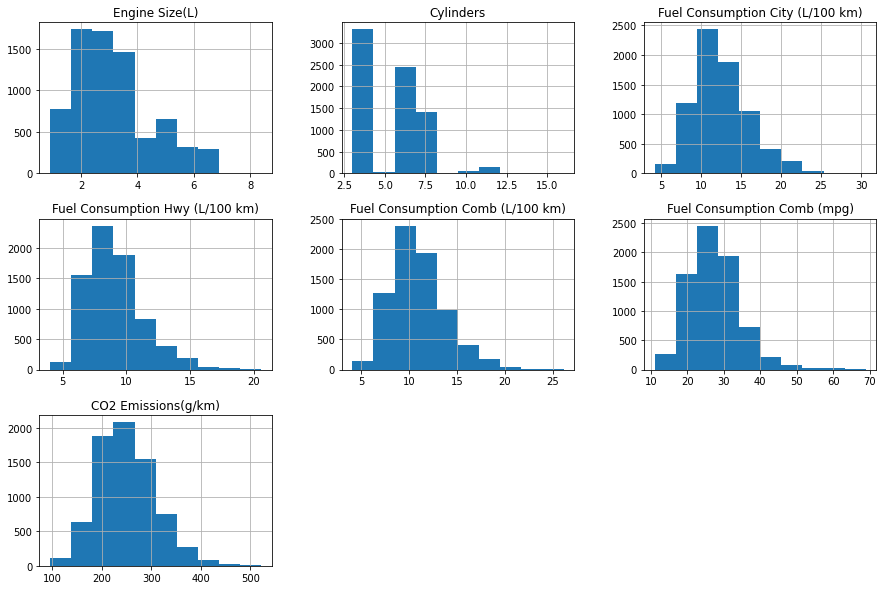

In [6]:
fuel_con.hist(figsize=(15,10));

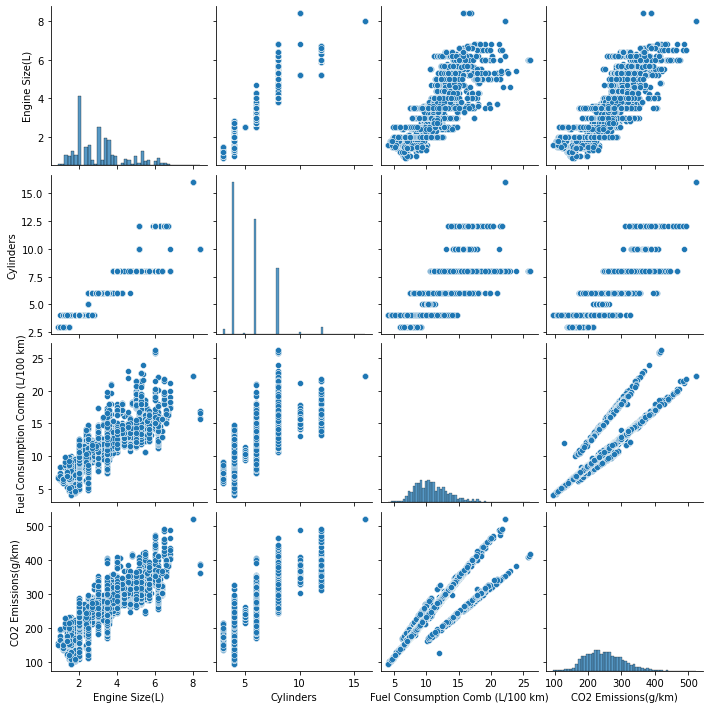

In [7]:
sns.pairplot(fuel_con[['Engine Size(L)','Cylinders','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]);
# we are omitting Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km) & Fuel Consumption Comb (mpg)
# because they have similar properties as Fuel Consumption Comb (L/100 km) for overall data
# and a 7x7 matrix will create more confusion

**For increasing the Engine Size, No. of Cylinders are generally increased. 
For larger Engine Sizes, Fuel consumption per distance also increases, resulting in higher CO2 Emissions**

**Our aim is to find out whether other parameters make noticeable change in the CO2 emissions**

In [8]:
fuel_con.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

## Analyzing the categorical values

In [9]:
fuel_con[['Make', 'Model', 'Vehicle Class','Transmission','Fuel Type']]

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z
...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z


In [10]:
[(category,fuel_con[category].nunique()) for category in fuel_con[['Make', 'Model', 'Vehicle Class','Transmission','Fuel Type']]]

[('Make', 42),
 ('Model', 2053),
 ('Vehicle Class', 16),
 ('Transmission', 27),
 ('Fuel Type', 5)]

**'Model' column has a large variety in the dataset : 2053 out of 7385. Varieties are nearly one third of the total dataset.  This column may not contribute much in machine learning model and can be dropped.**

**Except for 'Model' column, lets check the unique values for other categorical columns**

In [11]:
[(category,fuel_con[category].unique()) for category in fuel_con[['Make', 'Vehicle Class','Transmission','Fuel Type']]]

[('Make',
  array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
         'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
         'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
         'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
         'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
         'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
         'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
        dtype=object)),
 ('Vehicle Class',
  array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
         'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
         'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
         'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
         'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)),
 ('Transmission',
  array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7

**The Columns 'Transmission' and 'Fuel Type' can be converted to meaningful representations**

In [12]:
fuel_con["Transmission"] = np.where(fuel_con["Transmission"].isin(["A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "Automatic", fuel_con["Transmission"])
fuel_con["Transmission"] = np.where(fuel_con["Transmission"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "Automated Manual", fuel_con["Transmission"])
fuel_con["Transmission"] = np.where(fuel_con["Transmission"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "Automatic with Select Shift", fuel_con["Transmission"])
fuel_con["Transmission"] = np.where(fuel_con["Transmission"].isin(["AV", "AV6", "AV7", "AV8", "AV10"]), "Continuously Variable", fuel_con["Transmission"])
fuel_con["Transmission"] = np.where(fuel_con["Transmission"].isin(["M5", "M6", "M7"]), "Manual", fuel_con["Transmission"])

In [13]:
fuel_con['Transmission'].unique()

array(['Automatic with Select Shift', 'Manual', 'Continuously Variable',
       'Automated Manual', 'Automatic'], dtype=object)

In [14]:
fuel_con["Fuel Type"] = np.where(fuel_con["Fuel Type"]=="Z", "Premium Gasoline", fuel_con["Fuel Type"])
fuel_con["Fuel Type"] = np.where(fuel_con["Fuel Type"]=="X", "Regular Gasoline", fuel_con["Fuel Type"])
fuel_con["Fuel Type"] = np.where(fuel_con["Fuel Type"]=="D", "Diesel", fuel_con["Fuel Type"])
fuel_con["Fuel Type"] = np.where(fuel_con["Fuel Type"]=="E", "Ethanol(E85)", fuel_con["Fuel Type"])
fuel_con["Fuel Type"] = np.where(fuel_con["Fuel Type"]=="N", "Natural Gas", fuel_con["Fuel Type"])

In [15]:
fuel_con['Fuel Type'].unique()

array(['Premium Gasoline', 'Diesel', 'Regular Gasoline', 'Ethanol(E85)',
       'Natural Gas'], dtype=object)

In [16]:
fuel_con.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244


In [17]:
[(category,fuel_con[category].nunique()) for category in fuel_con[['Make', 'Model', 'Vehicle Class','Transmission','Fuel Type']]]

[('Make', 42),
 ('Model', 2053),
 ('Vehicle Class', 16),
 ('Transmission', 5),
 ('Fuel Type', 5)]

In [18]:
[(category,fuel_con[category].unique()) for category in fuel_con[['Make', 'Vehicle Class','Transmission','Fuel Type']]]

[('Make',
  array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
         'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
         'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
         'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
         'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
         'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
         'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
        dtype=object)),
 ('Vehicle Class',
  array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
         'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
         'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
         'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
         'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)),
 ('Transmission',
  array(['Automatic with Select Shift', 'Manual', 'Continuously Variable'

**Total no. of Car Makes : 42  
Total no. of Models : 2053 : Can be dropped  
Total Vehicle Class : 16  
Transmission : Converted from 27 to 5, as no. of clutches do not change the CO2 emission  
Fuel Type : 5 : Renamed for better identification**

### Frequency distribution of different Categorical Variables

In [19]:
[(category,fuel_con[category].value_counts()) for category in fuel_con[['Make','Vehicle Class','Transmission','Fuel Type']]]

[('Make',
  FORD             628
  CHEVROLET        588
  BMW              527
  MERCEDES-BENZ    419
  PORSCHE          376
  TOYOTA           330
  GMC              328
  AUDI             286
  NISSAN           259
  JEEP             251
  DODGE            246
  KIA              231
  HONDA            214
  HYUNDAI          210
  MINI             204
  VOLKSWAGEN       197
  MAZDA            180
  LEXUS            178
  JAGUAR           160
  CADILLAC         158
  SUBARU           140
  VOLVO            124
  INFINITI         108
  BUICK            103
  RAM               97
  LINCOLN           96
  MITSUBISHI        95
  CHRYSLER          88
  LAND ROVER        85
  FIAT              73
  ACURA             72
  MASERATI          61
  ROLLS-ROYCE       50
  ASTON MARTIN      47
  BENTLEY           46
  LAMBORGHINI       41
  ALFA ROMEO        30
  GENESIS           25
  SCION             22
  SMART              7
  BUGATTI            3
  SRT                2
  Name: Make, dtype: int

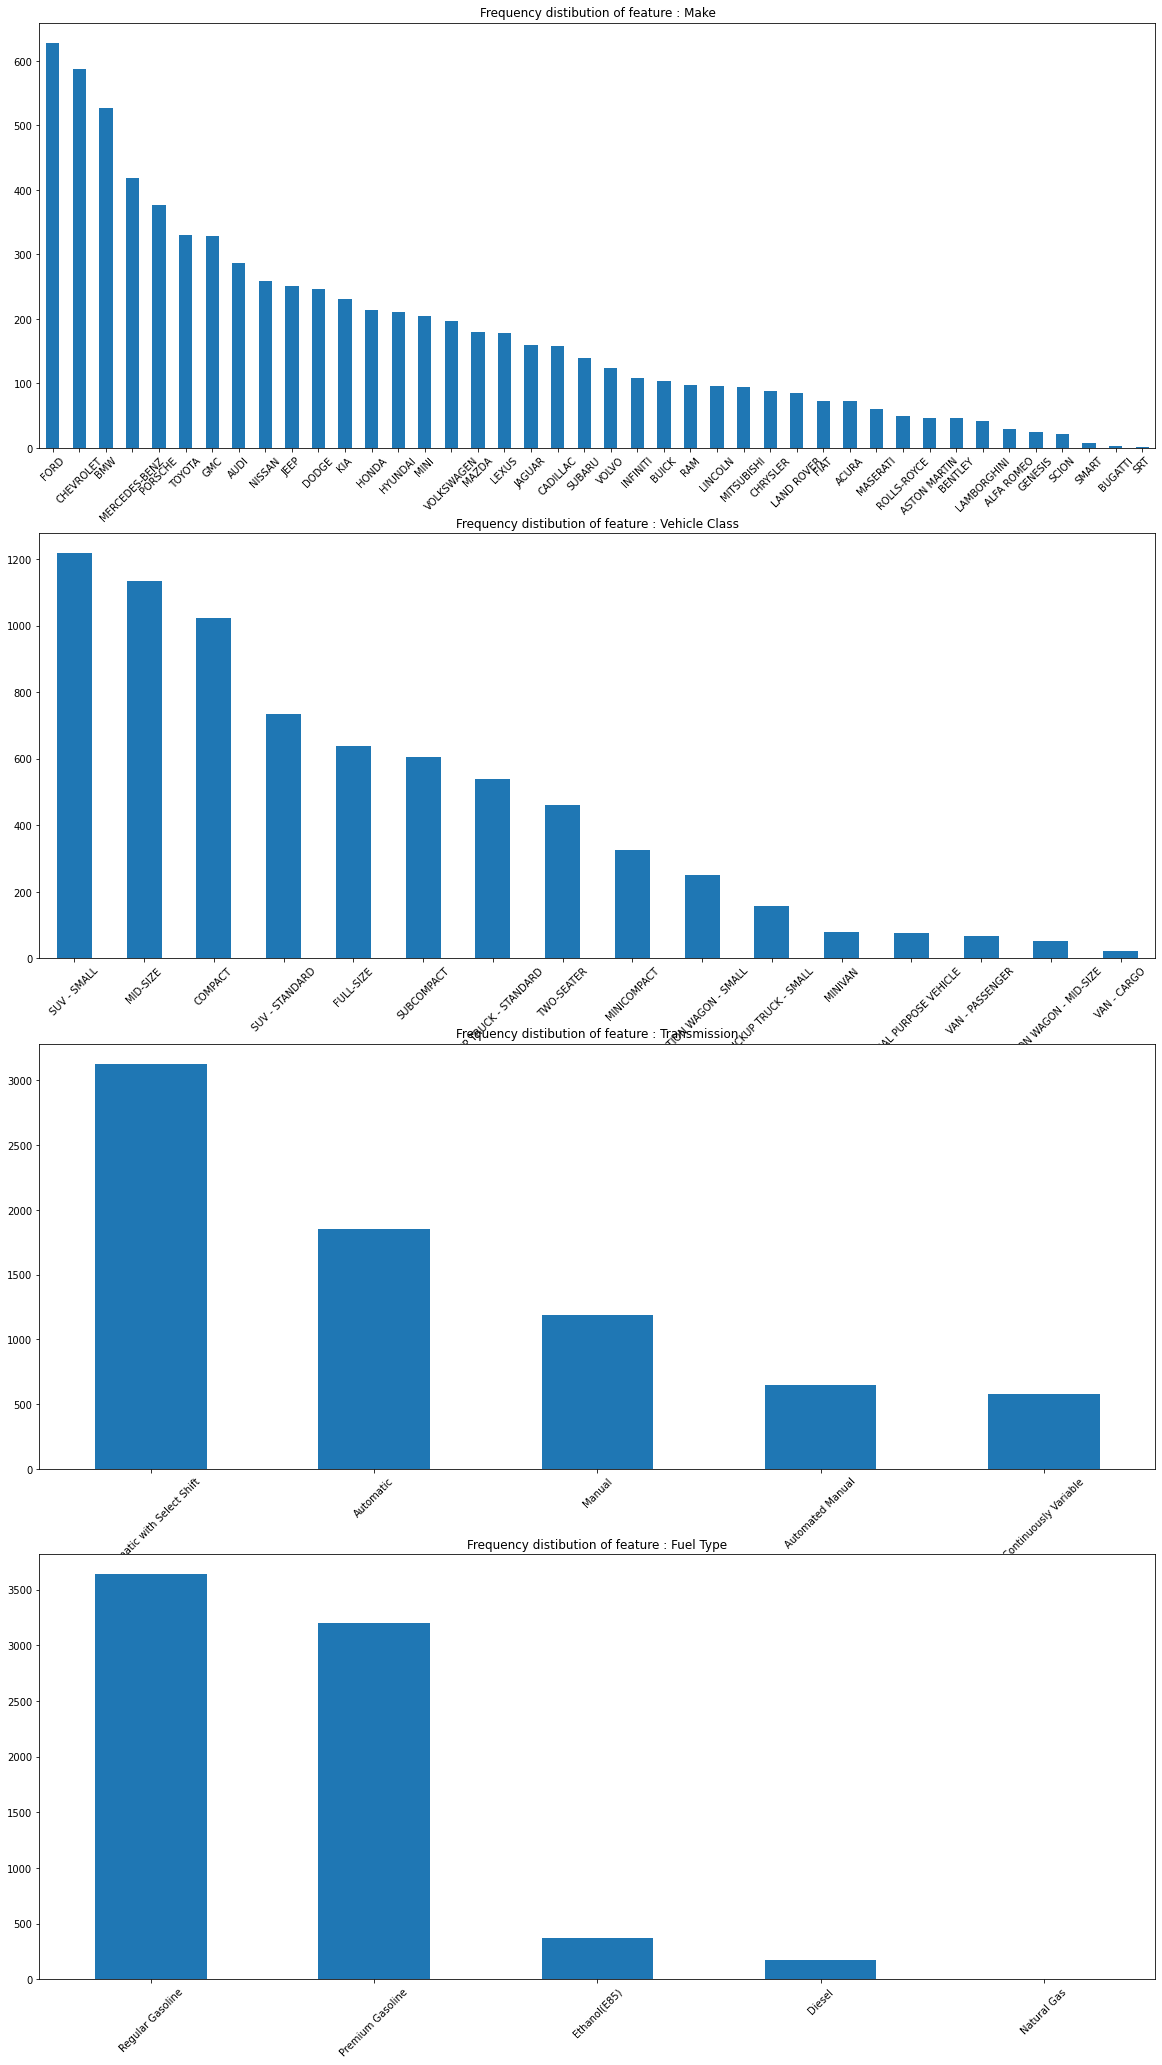

In [20]:
plt.figure(figsize=(20,36))
k = fuel_con[['Make','Vehicle Class','Transmission','Fuel Type']]
[(plt.subplot(411+k.columns.get_loc(category)),fuel_con[category].value_counts().plot(kind='bar'),plt.xticks(rotation=45), plt.title('Frequency distibution of feature : '+category)) 
 for category in k]
plt.show()

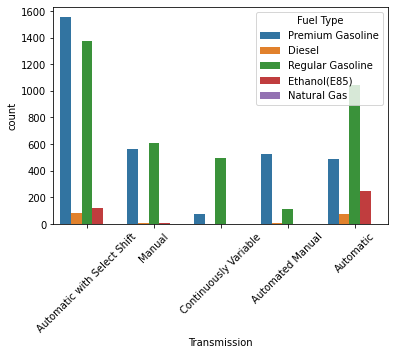

In [21]:
sns.countplot(data=fuel_con, x='Transmission', hue='Fuel Type')
plt.xticks(rotation=45);

**Ford, Chevrolet & BMW are the most available makes  
Although Vehicle Class wise SUV-Small, Mid Size & Compact are the most available vehicles  
Automatic with Select Shift are the most preferred type of transmission  
Regular Gasoline is the mostly used fuel**